In [14]:
STUD = 1032182533
def variant(stud):
    return f'Вариант: {stud%70+1}'
variant(STUD)

'Вариант: 54'

# Задача


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Случай 1</b>. Рассмотрим две фирмы, производящие взаимозаменяемые товары одинакового качества и находящиеся в одной рыночной нише. Считаем, что в рамках нашей модели конкурентная борьба ведётся только рыночными методами. То есть, конкуренты могут влиять на противника путем изменения параметров своего производства: себестоимость, время цикла, но не могут прямо вмешиваться в ситуацию на рынке («назначать» цену или влиять на потребителей каким-либо иным способом.) Будем считать, что постоянные издержки пренебрежимо малы, и в модели учитывать не будем. В этом случае динамика изменения объемов продаж фирмы 1 и фирмы 2 описывается следующей системой уравнений:


$$ \begin{cases} \frac{d M_1}{d \theta} = M_1 - \frac{b}{c_1} M_1 M_2 - \frac{a_1}{c_1} M_1^2 \\ \frac{d M_2}{d \theta} = \frac{c_2}{c_1} M_2 -\frac{b}{c_1} M_1 M_2 - \frac{a_2}{c_1} M_2^2 \end{cases} $$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Случай 2</b>. Рассмотрим модель, когда, помимо экономического фактора влияния (изменение себестоимости, производственного цикла, использование кредита и т.п.), используются еще и социально-психологические факторы – формирование общественного предпочтения одного товара другому, не зависимо от их качества и цены. В этом случае взаимодействие двух фирм будет зависеть друг от друга, соответственно коэффициент перед $M_1M_2$ будет отличаться. Пусть в рамках рассматриваемой модели динамика изменения объемов продаж фирмы 1 и фирмы 2 описывается следующей системой уравнений:

$$ \begin{cases} \frac{d M_1}{d \theta} = M_1 - (\frac{b}{c_1} + 0.00044) M_1 M_2 - \frac{a_1}{c_1} M_1^2 \\ \frac{d M_2}{d \theta} = \frac{c_2}{c_1} M_2 -\frac{b}{c_1} M_1 M_2 - \frac{a_2}{c_1} M_2^2 \end{cases} $$

Для обоих случаев рассмотрим задачу со следующими начальными условиями и параметрами:

$M_0^1 = 7.7$, $M_0^2 = 9.7$  
$p_{cr} = 47$, $N = 50$, $q = 1$,  
$\tau_1 = 33$, $\tau_2 = 27$  
$\tilde{p}_1 = 9.7$, $\tilde{p}_2 = 11.7$  

<b>Обозначения:</b>  
$N$ – число потребителей производимого продукта.  
$\tau$ – длительность производственного цикла  
$p$ – рыночная цена товара  
$p_{cr}$– себестоимость продукта, то есть переменные издержки на производство единицы продукции.  
$q$ – максимальная потребность одного человека в продукте в единицу времени  
$\theta = \frac{t}{c_1}$ - безразмерное время  


1. Постройте графики изменения оборотных средств фирмы 1 и фирмы 2 без
учета постоянных издержек и с веденной нормировкой для случая 1.
2. Постройте графики изменения оборотных средств фирмы 1 и фирмы 2 без
учета постоянных издержек и с веденной нормировкой для случая 2.

In [15]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [16]:
p_cr = 47 # критическая стоимость продукта

N = 50 # число потребителей производимого продукта.

q = 1 # максимальная потребность одного человека в продукте в единицу времени

tau1 = 33 # длительность производственного цикла фирмы 1

tau2 = 27 # длительность производственного цикла фирмы 2

p1 = 9.7 # себестоимость продукта у фирмы 1

p2 = 11.7 # себестоимость продукта у фирмы 2


In [17]:
a1 = p_cr/(tau1*tau1*p1*p1*N*q)

a2 = p_cr/(tau2*tau2*p2*p2*N*q)

b = p_cr/(tau1*tau1*tau2*tau2*p1*p1*p2*p2*N*q)

c1 = (p_cr-p1)/(tau1*p1)

c2 = (p_cr-p2)/(tau2*p2)

In [18]:
# Первый случай

def syst(x, t):
    dx1 = (c1/c1)*x[0] - (a1/c1)*x[0]*x[0] - (b/c1)*x[0]*x[1]
    dx2 = (c2/c1)*x[1] - (a2/c1)*x[1]*x[1] - (b/c1)*x[0]*x[1]
    return dx1, dx2

In [19]:
# Второй случай

def syst2(x, t):
    dx1 = x[0] - (b/c1 + 0.00044)*x[0]*x[1] - (a1/c1)*x[0]*x[0]
    dx2 = (c2/c1)*x[1] - (b/c1)*x[0]*x[1] - (a2/c1)*x[1]*x[1]
    return dx1, dx2

In [9]:
t = np.arange(0, 20, 0.01)

In [10]:
# Начальное значение объема оборотных средств x1 и х2

x0=[7.7, 9.7]

In [11]:
y = odeint(syst, x0, t)
y2 = odeint(syst2, x0, t)

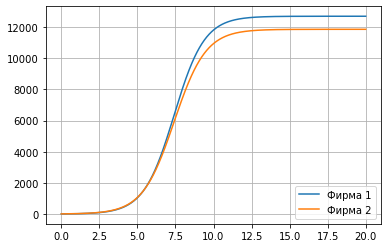

In [12]:
# Случай 1

plt.plot(t, y[:,0], label='Фирма 1')
plt.plot(t, y[:,1], label='Фирма 2')
plt.legend(loc=4)
plt.grid()

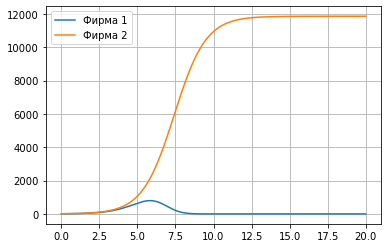

In [13]:
# Случай 2

plt.plot(t, y2[:,0], label='Фирма 1')
plt.plot(t, y2[:,1], label='Фирма 2')
plt.legend()
plt.grid()